In [1]:
# import nessesary modules
import tensorflow as tf
import os
import cv2
import numpy as np
import matplotlib.pyplot as plt
import random
import pickle
from sklearn.metrics import accuracy_score,precision_score,recall_score

2023-12-23 18:13:11.659840: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2023-12-23 18:13:12.042202: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2023-12-23 18:13:12.045674: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-12-23 18:13:14.280170: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT


In [2]:
DATA_PATH='datasets'
CLASSES=os.listdir(DATA_PATH)
CLASSES.sort()
# IMG_WIDTH=640
# IMG_HEIGHT=480
IMG_WIDTH=300
IMG_HEIGHT=300
RGB=3
NUM_CLASSES=len(CLASSES)
EPOCHS=8

In [3]:
data=tf.keras.utils.image_dataset_from_directory(DATA_PATH,
                                                 image_size=(IMG_WIDTH,IMG_HEIGHT))

Found 800 files belonging to 4 classes.


In [4]:
data_augmentation = tf.keras.Sequential([
    tf.keras.layers.experimental.preprocessing.RandomFlip("horizontal", 
                                                 input_shape=(IMG_HEIGHT, 
                                                              IMG_WIDTH,
                                                              RGB)),
    tf.keras.layers.experimental.preprocessing.RandomRotation(0.1),
    #tf.keras.layers.experimental.preprocessing.RandomZoom(0.1),
])

In [5]:
data=data.map(lambda x,y: (x/255,y))

In [6]:
train_size = int(len(data)*0.8)
val_size = int(len(data)*0.1)
test_size = int(len(data)*0.1)

train = data.take(train_size)
val = data.skip(train_size).take(val_size)
test = data.skip(train_size+val_size).take(test_size)

In [7]:
model=tf.keras.Sequential([
    #data_augmentation,
    tf.keras.layers.Conv2D(16, (3,3),1, activation='relu'),
    tf.keras.layers.MaxPooling2D(),

    tf.keras.layers.Conv2D(32, (3,3),1, activation='relu'),
    tf.keras.layers.MaxPooling2D(),
    
    tf.keras.layers.Dropout(0.1),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(NUM_CLASSES)    
])

In [8]:
model.compile(optimizer=tf.keras.optimizers.RMSprop(learning_rate=1e-4),
               loss=tf.losses.SparseCategoricalCrossentropy(from_logits=True), 
               metrics=['accuracy']
               )

In [9]:
if os.path.isfile('model.h5'):
    model=tf.keras.models.load_model('model.h5')
    with open('trainHistoryDict', "rb") as file:
        hist = pickle.load(file)

else:
    history=model.fit(train, epochs=EPOCHS,validation_data=val)    
    model.save('model.h5')
    hist=history.history
    with open('trainHistoryDict', 'wb') as file:
        pickle.dump(hist, file)

Epoch 1/8


20/20 [==============================] - 30s 1s/step - loss: 1.7859 - accuracy: 0.3141 - val_loss: 1.4116 - val_accuracy: 0.2656
Epoch 2/8
20/20 [==============================] - 27s 1s/step - loss: 1.1715 - accuracy: 0.4844 - val_loss: 0.9345 - val_accuracy: 0.6406
Epoch 3/8
20/20 [==============================] - 30s 1s/step - loss: 0.9388 - accuracy: 0.7172 - val_loss: 0.7780 - val_accuracy: 0.7344
Epoch 4/8
20/20 [==============================] - 28s 1s/step - loss: 0.7336 - accuracy: 0.7563 - val_loss: 0.6337 - val_accuracy: 0.6875
Epoch 5/8
20/20 [==============================] - 31s 2s/step - loss: 0.5820 - accuracy: 0.7953 - val_loss: 0.3511 - val_accuracy: 0.9062
Epoch 6/8
20/20 [==============================] - 32s 2s/step - loss: 0.5073 - accuracy: 0.7953 - val_loss: 0.5886 - val_accuracy: 0.6562
Epoch 7/8
20/20 [==============================] - 29s 1s/step - loss: 0.3881 - accuracy: 0.8813 - val_loss: 0.3180 - val_accuracy: 0.8906
Epoch 8/8
20/20 [====================

/home/linuxik/.local/lib/python3.10/site-packages/keras/src/engine/training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


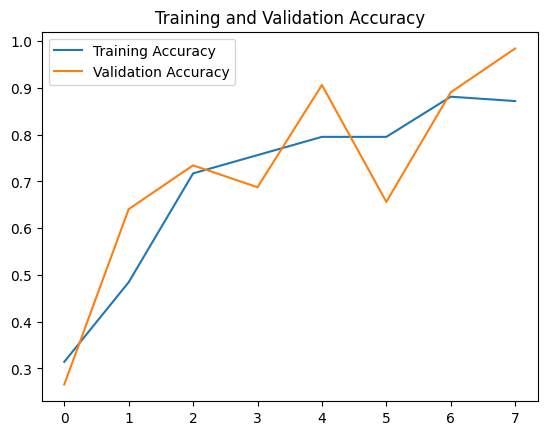

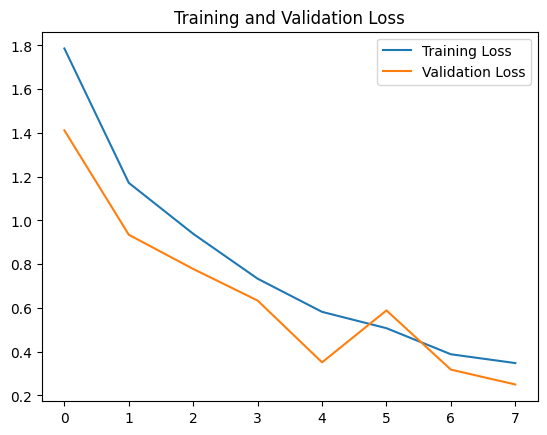

In [10]:
acc = hist['accuracy']
val_acc = hist['val_accuracy']

loss = hist['loss']
val_loss = hist['val_loss']

epochs_range = range(EPOCHS)

plt.figure()
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='best')
plt.title('Training and Validation Accuracy')

plt.figure()
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='best')
plt.title('Training and Validation Loss')
plt.show()

In [11]:
for index,batch in enumerate(test.as_numpy_iterator()): 
    X, y = batch
    yhat = model.predict(X)
    accuracy_result=accuracy_score(y, np.argmax(yhat, axis=1))
    precision_result=precision_score(y, np.argmax(yhat, axis=1),average='micro')
    recall_result=recall_score(y, np.argmax(yhat, axis=1),average='micro')
    F1Score = 2 * (precision_result * recall_result) / (precision_result + recall_result)
    print(f'metrics in batch {index}')
    print(f'accuracy: {accuracy_result}')
    print(f'precision: {precision_result}')
    print(f'recall: {recall_result}')
    print(f'F1Score : {F1Score}')

1/1 [==============================] - 0s 248ms/step
metrics in batch 0
accuracy: 0.9375
precision: 0.9375
recall: 0.9375
F1Score : 0.9375
1/1 [==============================] - 0s 185ms/step
metrics in batch 1
accuracy: 1.0
precision: 1.0
recall: 1.0
F1Score : 1.0


(480, 640, 3)
1/1 [==============================] - 0s 68ms/step
(480, 640, 3)
1/1 [==============================] - 0s 32ms/step
(480, 640, 3)
1/1 [==============================] - 0s 36ms/step
(480, 640, 3)
1/1 [==============================] - 0s 55ms/step
(480, 640, 3)
1/1 [==============================] - 0s 47ms/step
(480, 640, 3)
1/1 [==============================] - 0s 44ms/step
(480, 640, 3)
1/1 [==============================] - 0s 72ms/step
(480, 640, 3)
1/1 [==============================] - 0s 54ms/step
(480, 640, 3)
1/1 [==============================] - 0s 42ms/step
(480, 640, 3)
1/1 [==============================] - 0s 37ms/step


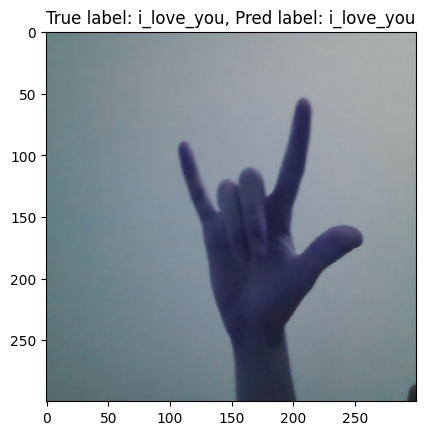

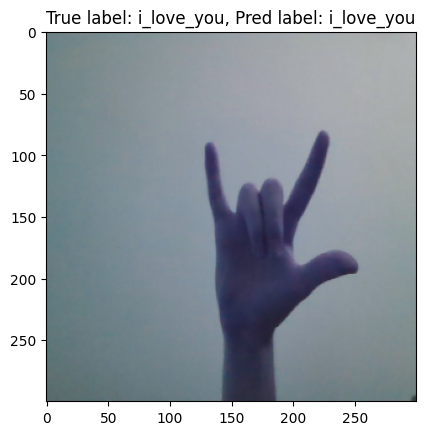

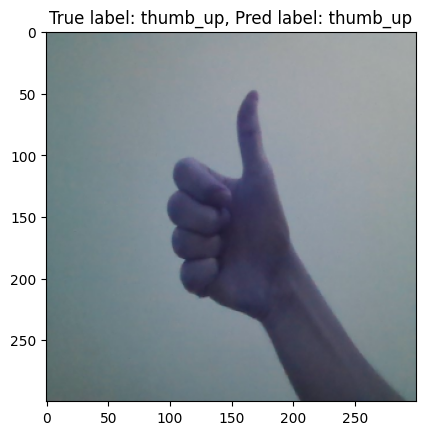

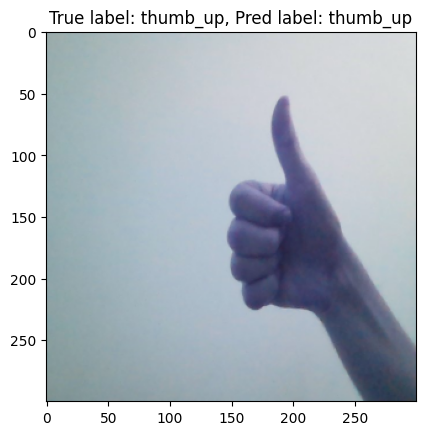

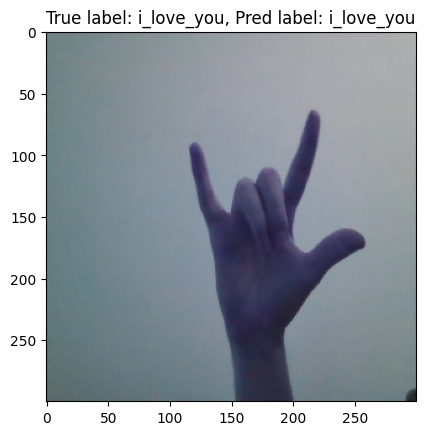

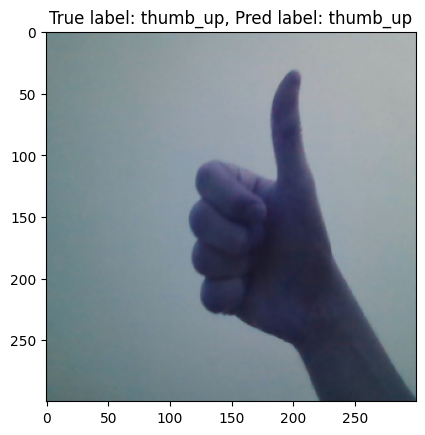

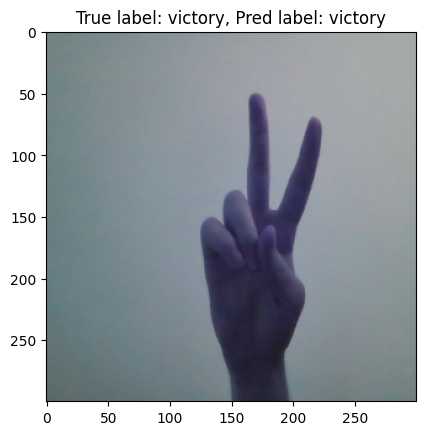

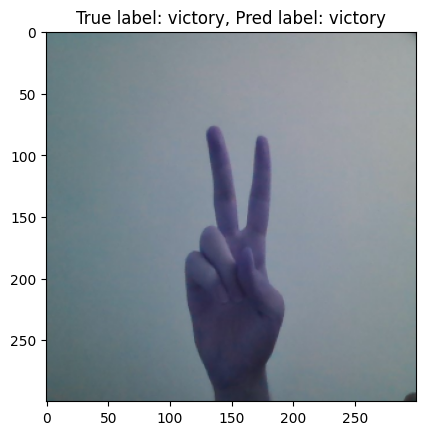

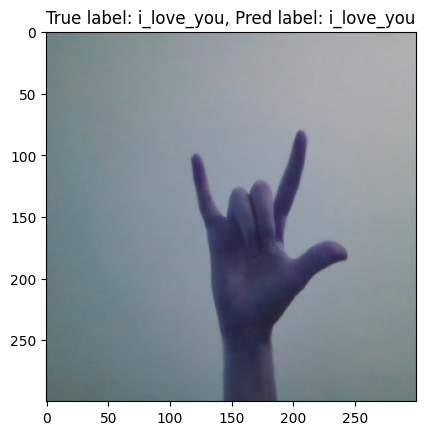

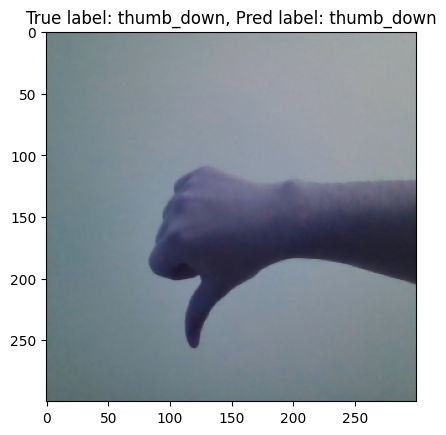

In [12]:
for _ in range(10):
    random_class=random.choice(CLASSES)
    random_path=os.path.join(DATA_PATH,random_class)
    random_image=random.choice(os.listdir(random_path))
    img=cv2.imread(os.path.join(random_path,random_image))
    print(img.shape)
    if img.shape!=(IMG_WIDTH,IMG_HEIGHT,RGB):
        img = cv2.resize(img, (IMG_WIDTH, IMG_HEIGHT), interpolation = cv2.INTER_AREA)
    ans=model.predict(np.expand_dims(img/255,0))
    true_label=random_class
    pred_label=CLASSES[ans.argmax()]
    plt.figure()
    plt.title(f"True label: {true_label}, Pred label: {pred_label}")
    plt.imshow(img)
plt.show()